In [1]:
from IPython.display import display, Image
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
from math import ceil
from presentation_functions import faded_color_vectors

In [2]:
data = pd.read_pickle(r"../data/B00020S.pkl")
data['Date'] = pd.to_datetime(data['Date'])

# Estymacja poziomu wody w Odrze na wysokości Głogowa

## Mapa przedstawiająca stacje hydrologiczne na Odrze i jej dopływach.

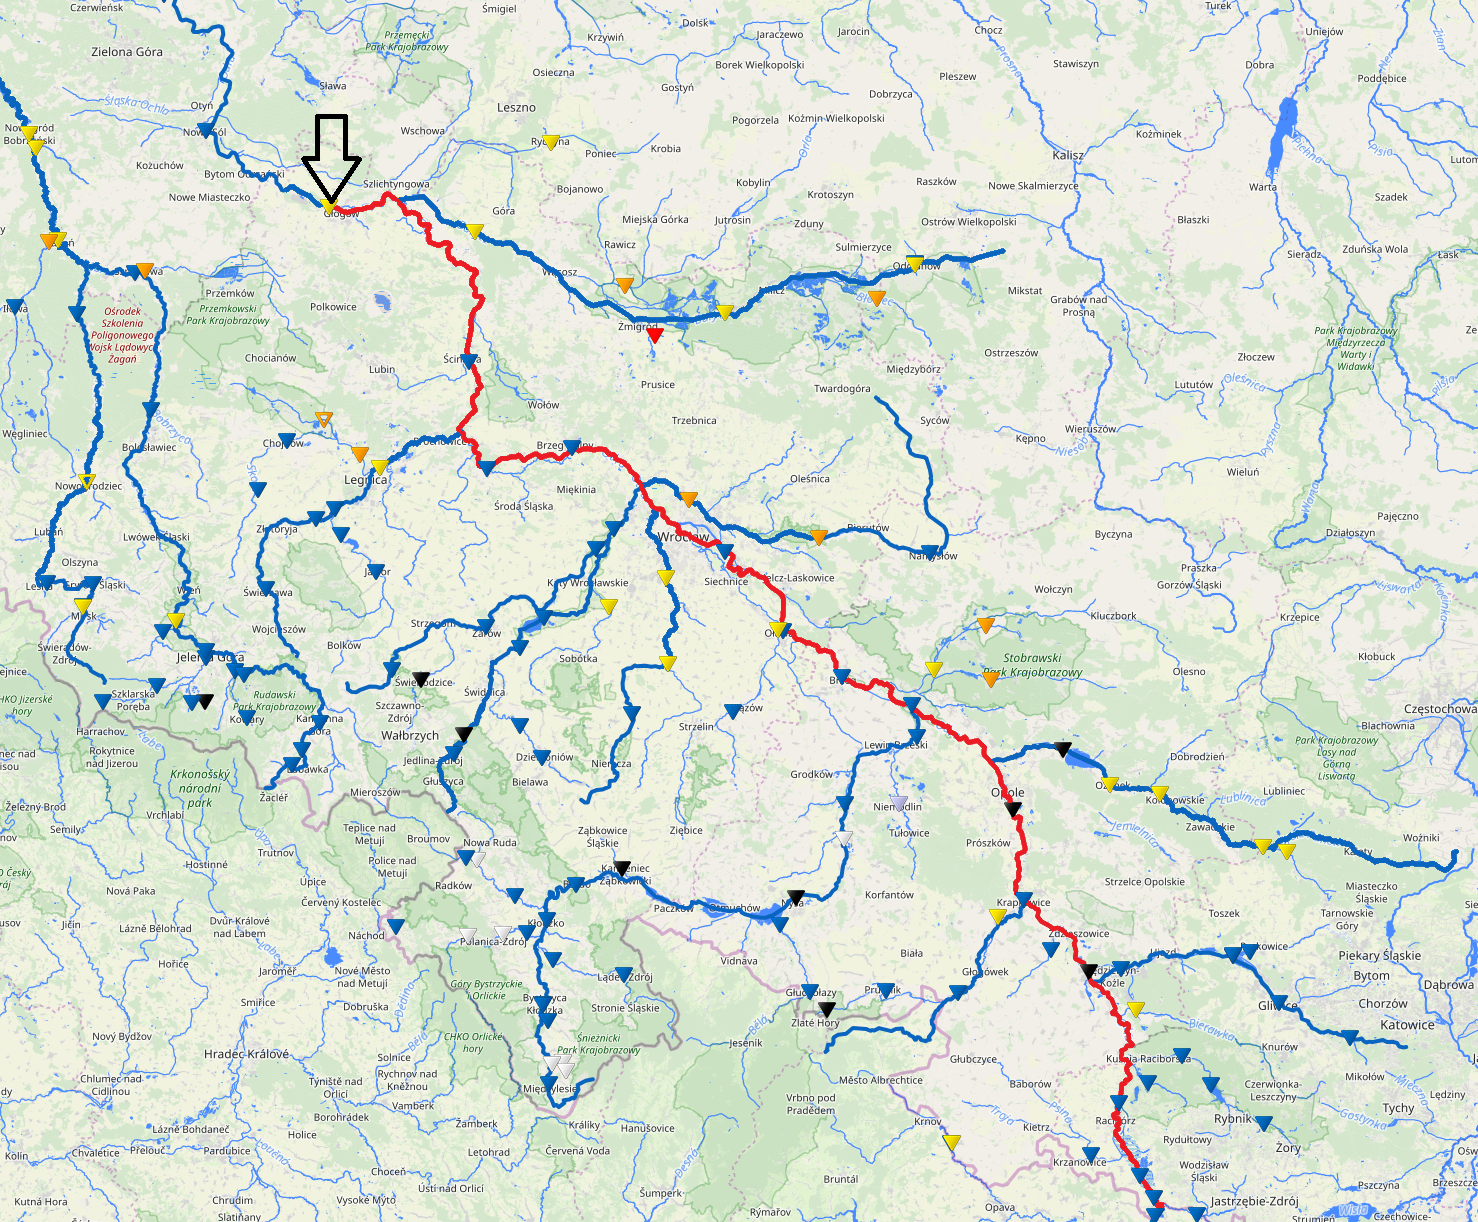

In [4]:
display(Image(filename='../data/imgw-map.png'))

## Wykresy porównujące poziom wody w wybranych stacjach

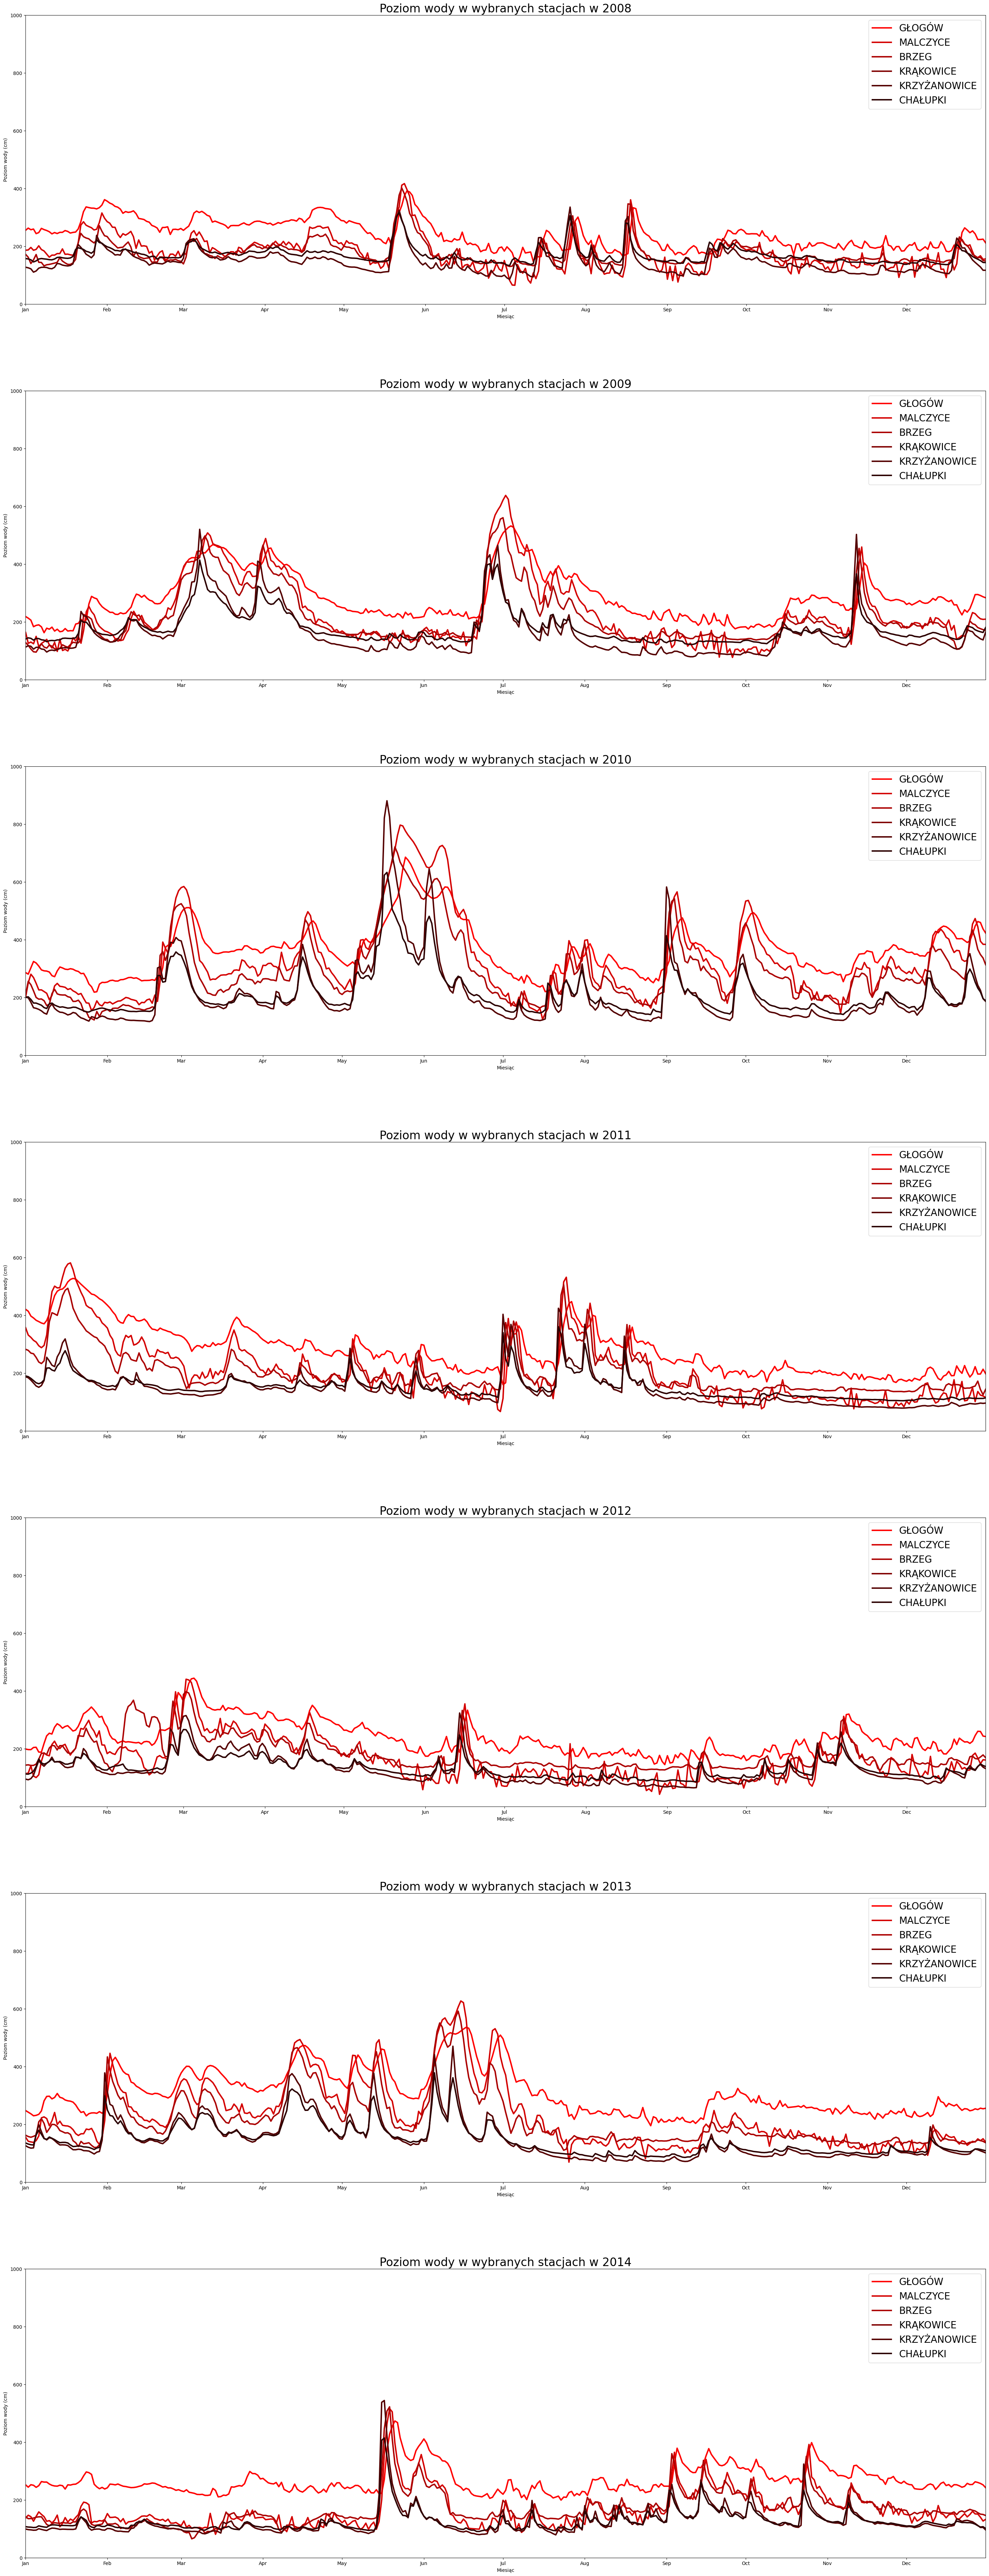

In [8]:
stations = ['GŁOGÓW', 'MALCZYCE', 'BRZEG', 'KRĄKOWICE', 'KRZYŻANOWICE', 'CHAŁUPKI']
years = range(2008, 2015)
months_range = range(1,13)
custom_palette = faded_color_vectors((1,0,0), len(stations))

fig, axes = plt.subplots(figsize=(36,16*(len(years)-1)), ncols=1, nrows=len(years), gridspec_kw={'hspace': 0.3})

data_temp = data.groupby(['Date', 'Station'])['B00020S'].mean().reset_index()

for i, year in enumerate(years):
    data_temp_yearly = data_temp[(data_temp['Date'].dt.year == year) & (data_temp['Date'].dt.month.isin(months_range))]
    for j, station in enumerate(stations):
        data_station = data_temp_yearly[data_temp_yearly['Station'] == station]
        color = custom_palette[j]
        axes[i].plot(data_station['Date'], data_station['B00020S'], label=station, linewidth=3, color=color)
    axes[i].legend(loc='upper right', fontsize=20)
    axes[i].set_xlabel('Miesiąc')
    axes[i].set_ylabel('Poziom wody (cm)')
    axes[i].set_title(f'Poziom wody w wybranych stacjach w {year}', fontsize=24)
    axes[i].set_xlim(data_temp_yearly['Date'].min(), data_temp_yearly['Date'].max())
    axes[i].set_ylim(0, 1000)

    months_locator = MonthLocator()
    months_fmt = DateFormatter("%b")
    axes[i].xaxis.set_major_locator(months_locator)
    axes[i].xaxis.set_major_formatter(months_fmt)

plt.show()

## Wykresy porównujące poziom wody w Głogowie w wybranych latach

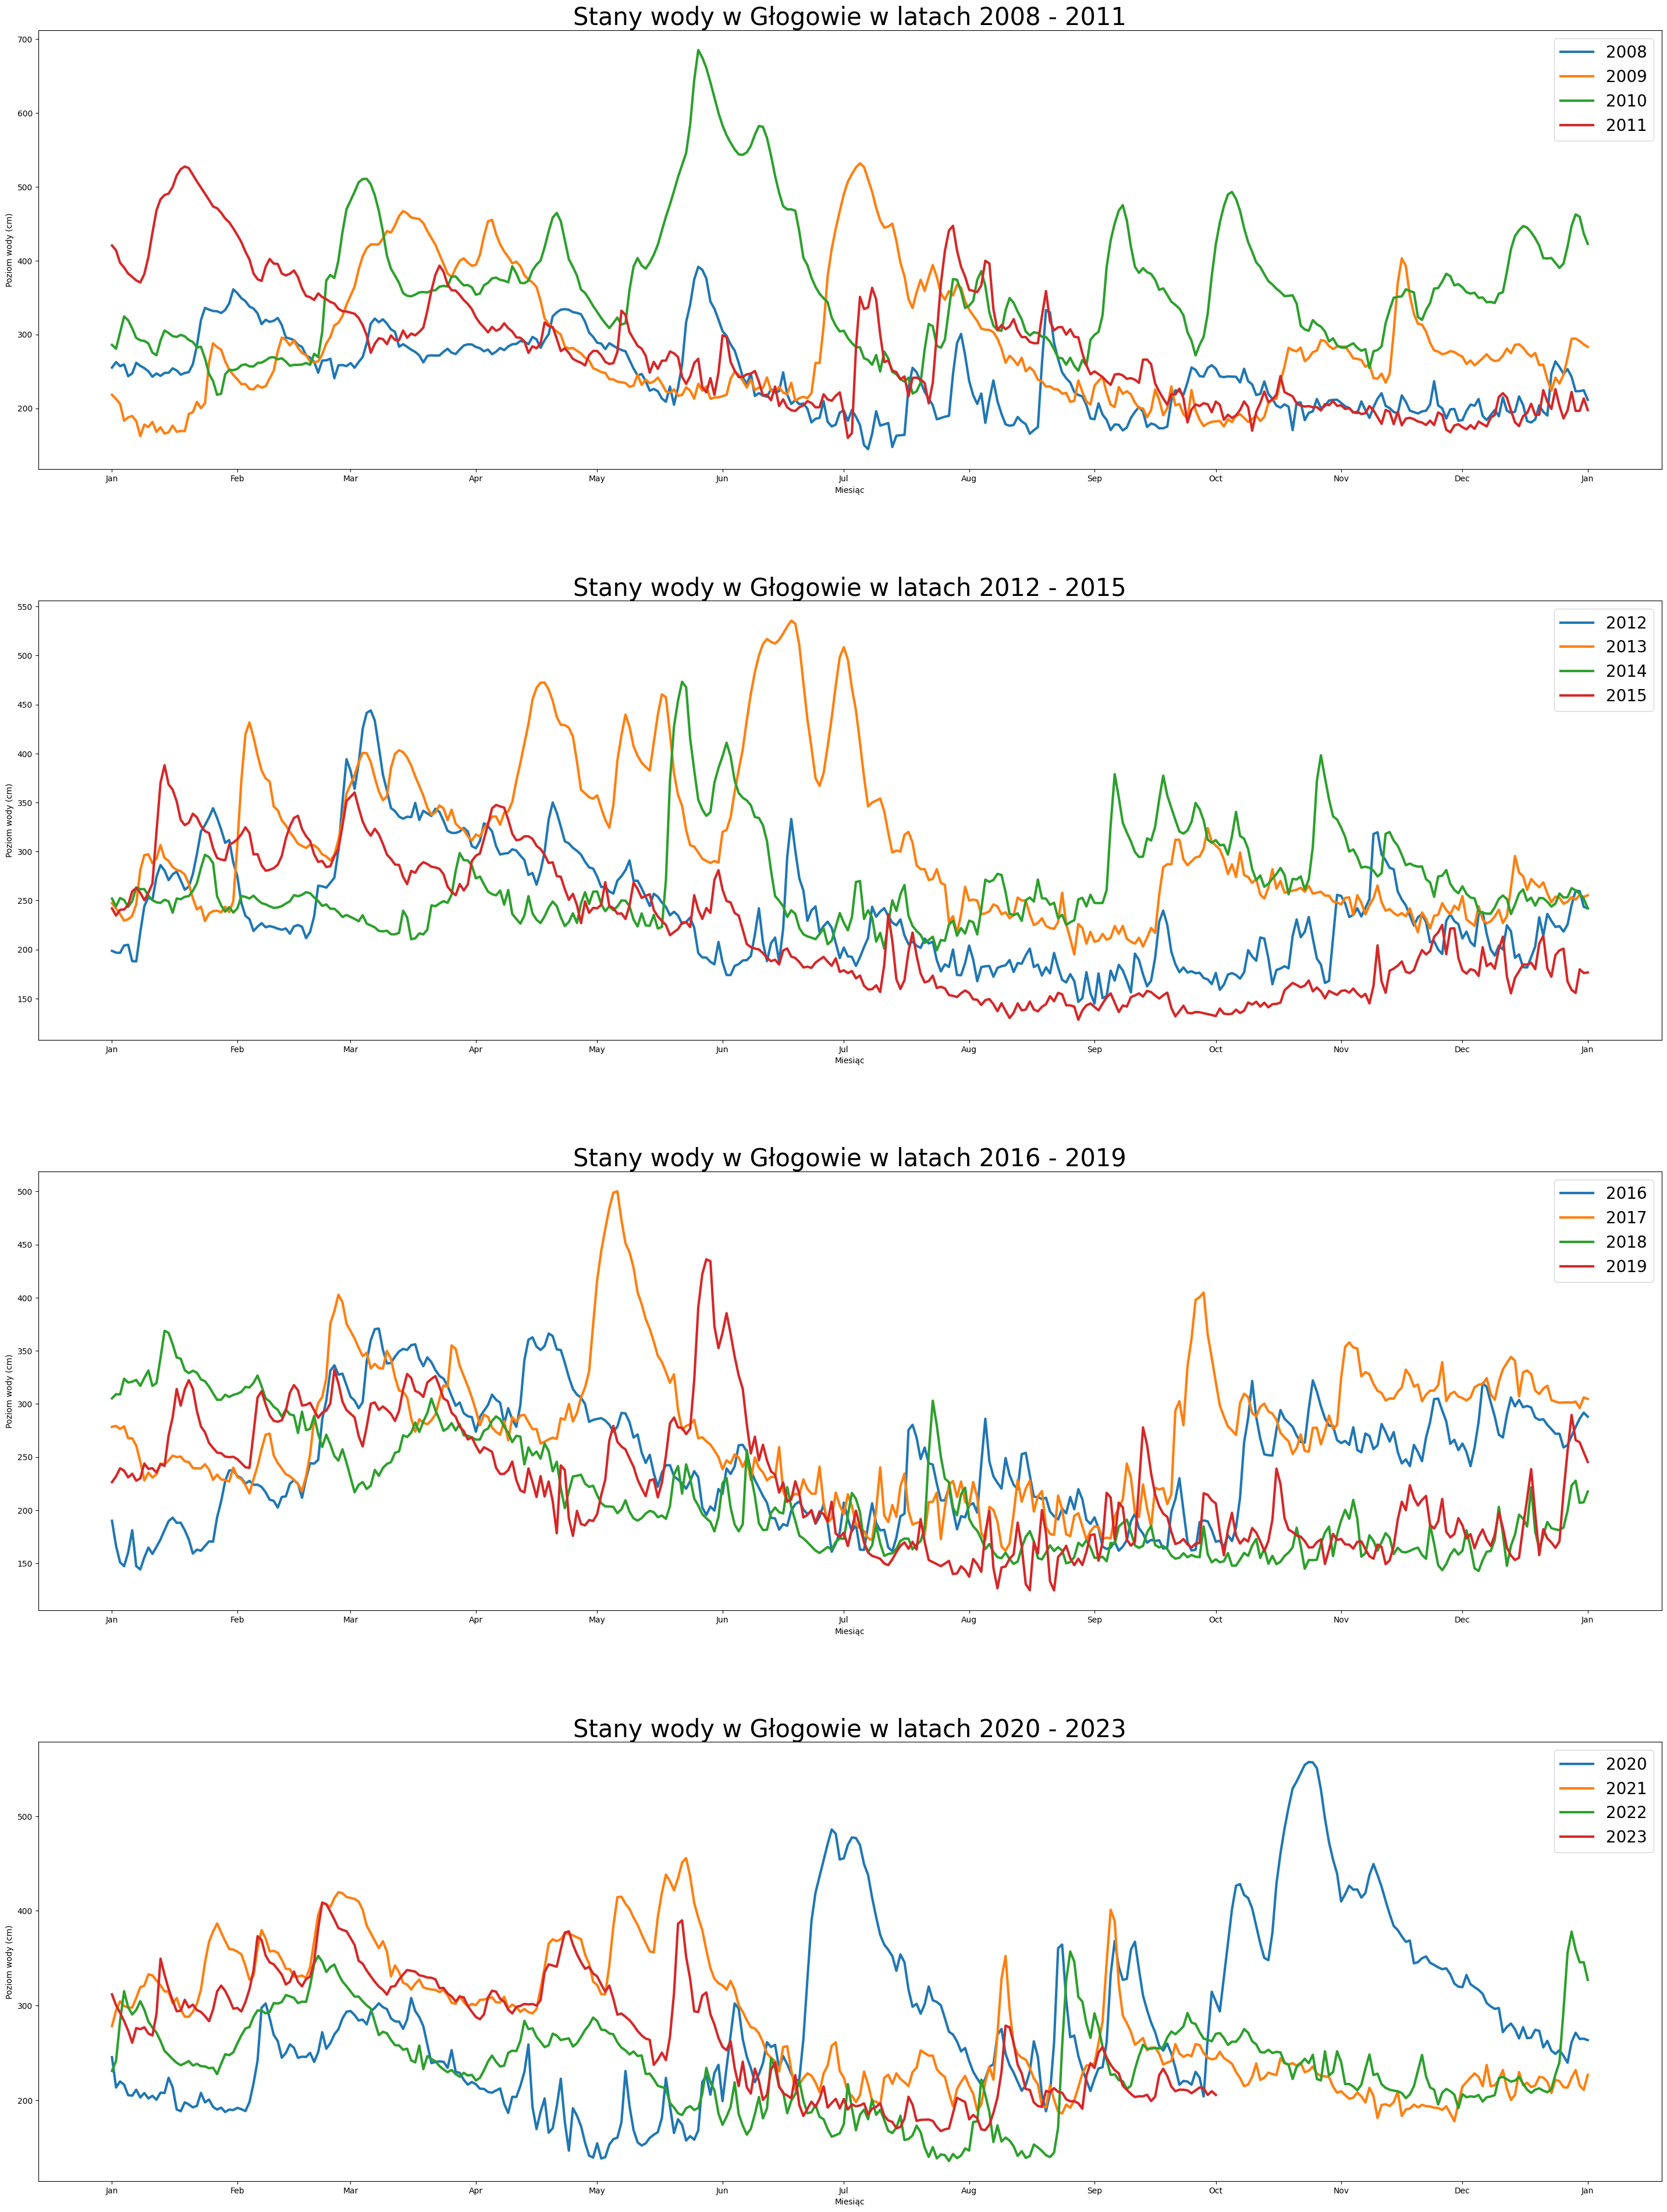

In [6]:
years_per_chart = 4
station_name = 'GŁOGÓW'

data_glg = data[data.Station == station_name]
data_grouped = data_glg.groupby(['Date'])['B00020S'].mean().reset_index()
data_grouped['Year'] = data_grouped['Date'].dt.year
data_grouped['Date'] = data_grouped['Date'].dt.strftime('%m-%d')

n_charts = ceil(16/years_per_chart)

fig, axes = plt.subplots(figsize=(36, 16*(n_charts-1)), ncols=1, nrows=n_charts, gridspec_kw={'hspace': 0.3})

for i in range(n_charts):
    years = range(2008 + i * years_per_chart, 2008 + years_per_chart + i * years_per_chart)
    for j, year in enumerate(years):
        data_year = data_grouped[data_grouped['Year'] == year]
        axes[i].plot(data_year['Date'], data_year['B00020S'], label=year, linewidth=3)
        axes[i].legend(loc='upper right', fontsize=20)
        axes[i].set_title(f'Stany wody w Głogowie w latach {2008 + i * years_per_chart} - {2008 + years_per_chart + i * years_per_chart - 1}', fontsize=30)
        axes[i].set_xlabel('Miesiąc')
        axes[i].set_ylabel('Poziom wody (cm)')
        months_locator = MonthLocator()
        months_fmt = DateFormatter("%b")
        axes[i].xaxis.set_major_locator(months_locator)
        axes[i].xaxis.set_major_formatter(months_fmt)

plt.show()


## Szukanie prędkości wody

W równaniach Bernoulliego są wykorzystywane wysokość i ciśnienie, ale ani tego ani tego nie jesteśmy w stanie oszacować

Znaleźliśmy wzór $\text{przepływ} = \text{pole przekroju} \cdot \text{średnia prędkość}$, przepływ znamy, prędkości jest szukaną, jedynym problem jest pole przekroju
Pole przekroju jest do znalezienia jeżeli przyjmiemy, że przekrój poprzeczny rzeki to półkole albo nawet półelipsa - wtedy wystarczy znaleźć szerokość rzeki i jej max. głębokość
W wyniku głębszych analiz moglibyśmy sprawdzić czy szerokość i głębokość jest w przybliżeniu stała na całej jej długości, to bardzo ułatwiłoby nam znalezienie prędkości dla danego przepływu

Trzecim pomysłem jest wykorzystanie wzoru $v = \frac{\Delta s}{\Delta t}$, $\Delta t$ możemy znaleźć na podstawie różnic czasowych w peakach na podstawie czerwonych wykresów a $\Delta s$ na podstawie fizycznie
odległości między stacjami.


todo:
plotly
geoportal - szerokość rzeki
różnice w czasie i wartości
zbiorniki retencyjne
przekrojem